In [15]:
### Compare cell-type annotations between automated azimuth approach 
### and the initial cluster-based manual annotations


#############################################
# Prerequisites - Load Libraries

In [16]:
source('MS0_Libraries.r')

Warning message in read.table(file = file, header = header, sep = sep, quote = quote, :
“incomplete final line found by readTableHeader on '../conda_environment/Environment_Configs.csv'”


[1] "/home/icb/corinna.losert/miniconda3/envs/stark_stemi_R_Env_4_1//lib/R/library"


In [17]:
source('MS4_Plot_Config.r')

###############################################
# Preqrequisites Configurations & Parameters

In [18]:
data_path ='../data/current'

In [19]:
result_path = '../results/current'

In [20]:
data_path

[1] "../data/current"

In [21]:
libraries = c('L1', 'L2', 'L3', 'L4', 'L5', 'L6', 'L7', 'L8', 'L9', 'L10', 'L11', 'L12', 'L13', 'L14')

# Load Data

In [22]:
### Load annotated seurat object used as input for pseudobulk preparation

source_text = paste( data_path, '/analysis/B/B6_DE_Integrated_Singlet_processed_rna.h5seurat', sep = '')
print(source_text)
print(file.info(source_text)$mtime)
rna_seurat_data = LoadH5Seurat(source_text, assays = "RNA", quietly = TRUE )



[1] "../data/current/analysis/B/B6_DE_Integrated_Singlet_processed_rna.h5seurat"
[1] "2023-01-21 12:14:40 CET"


Validating h5Seurat file

Initializing RNA with data

Adding counts for RNA

Adding scale.data for RNA

Adding feature-level metadata for RNA

Adding command information

Adding cell-level metadata



In [23]:
rna_seurat_data

An object of class Seurat 
19221 features across 148275 samples within 1 assay 
Active assay: RNA (19221 features, 0 variable features)
 3 layers present: counts, data, scale.data

In [24]:
head(rna_seurat_data[[]],2)

,nCount_HTO,B2_Scanorama_Singlet_cluster,B2_Scanorama_Singlet_rb_mt_cluster,cell_type_Scanorama,cluster_cell_type_Scanorama,classification_measurement,delta_ef_value_group_measurement,m_y,measurement_y,delta_ef_value_group,⋯,sample_x,library,id,read,pattern,sequence,feature_type,in_sample,display_name,group_x
,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,⋯,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<fct>,<fct>
AAACCCACATACAGGG-1-L1,1574,8,8,B-cell,8_B-cell,acs_w_o_infection_TP1,x_greater_1_TP1,"M9 (14,3)",TP1,x_greater_1,⋯,9.1,L1,HTO_B0259,R2,5PNNNNNNNNNN(BC),CAGTAGTCACGGTCA,Antibody Capture,1,9.1,TP1
AAACCCACATGACTTG-1-L1,379,9,9,Monocytes - CD16_FCGR3A,9_Monocytes - CD16_FCGR3A,acs_w_o_infection_TP1,x_greater_1_TP1,"M9 (14,3)",TP1,x_greater_1,⋯,9.1,L1,HTO_B0259,R2,5PNNNNNNNNNN(BC),CAGTAGTCACGGTCA,Antibody Capture,1,9.1,TP1


In [25]:
meta_data = rna_seurat_data[[]]

In [26]:
nrow(meta_data)

[1] 148275

In [27]:
colnames(meta_data)

[1] "nCount_HTO"                         "B2_Scanorama_Singlet_cluster"      
 [3] "B2_Scanorama_Singlet_rb_mt_cluster" "cell_type_Scanorama"               
 [5] "cluster_cell_type_Scanorama"        "classification_measurement"        
 [7] "delta_ef_value_group_measurement"   "m_y"                               
 [9] "measurement_y"                      "delta_ef_value_group"              
[11] "delta_ef_value"                     "sample_y"                          
[13] "age"                                "sex"                               
[15] "m_x"                                "classification"                    
[17] "group_y"                            "measurement_x"                     
[19] "sample_x"                           "library"                           
[21] "id"                                 "read"                              
[23] "pattern"                            "sequence"                          
[25] "feature_type"                       "in_sample"                         
[27] "display_name"                       "group_x"

In [28]:
# rownames are the cell-names

In [29]:
### Load cell-type classification with Azimuth

In [33]:
path = paste0(data_path, '/analysis/G/G2_Cell_Annotations_Azimuth.csv')
azimuth_annotation = read.csv(path)
print(file.info(path)$mtime)

[1] "2023-01-30 17:10:42 CET"


In [34]:
azimuth_annotation$cell_library = paste0(azimuth_annotation$cell, '-', azimuth_annotation$library)

In [35]:
head(azimuth_annotation,2)

,X,nCount_RNA,nFeature_RNA,predicted.celltype.l2,predicted.celltype.l2.score,library,cell,cell_library
,<chr>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>,<chr>
1,AAACCCACATACAGGG-1,3947,1232,B memory,0.9668187,L1,AAACCCACATACAGGG-1,AAACCCACATACAGGG-1-L1
2,AAACCCACATGACTTG-1,5871,1890,CD16 Mono,1.0000000,L1,AAACCCACATGACTTG-1,AAACCCACATGACTTG-1-L1


In [37]:
### Investigate library distribution of azimuth cell-types

In [38]:
lib_distribution = azimuth_annotation %>% group_by(library, predicted.celltype.l2) %>% count()

In [39]:
head(lib_distribution,2)

library,predicted.celltype.l2,n
<chr>,<chr>,<int>
L1,B intermediate,166
L1,B memory,74


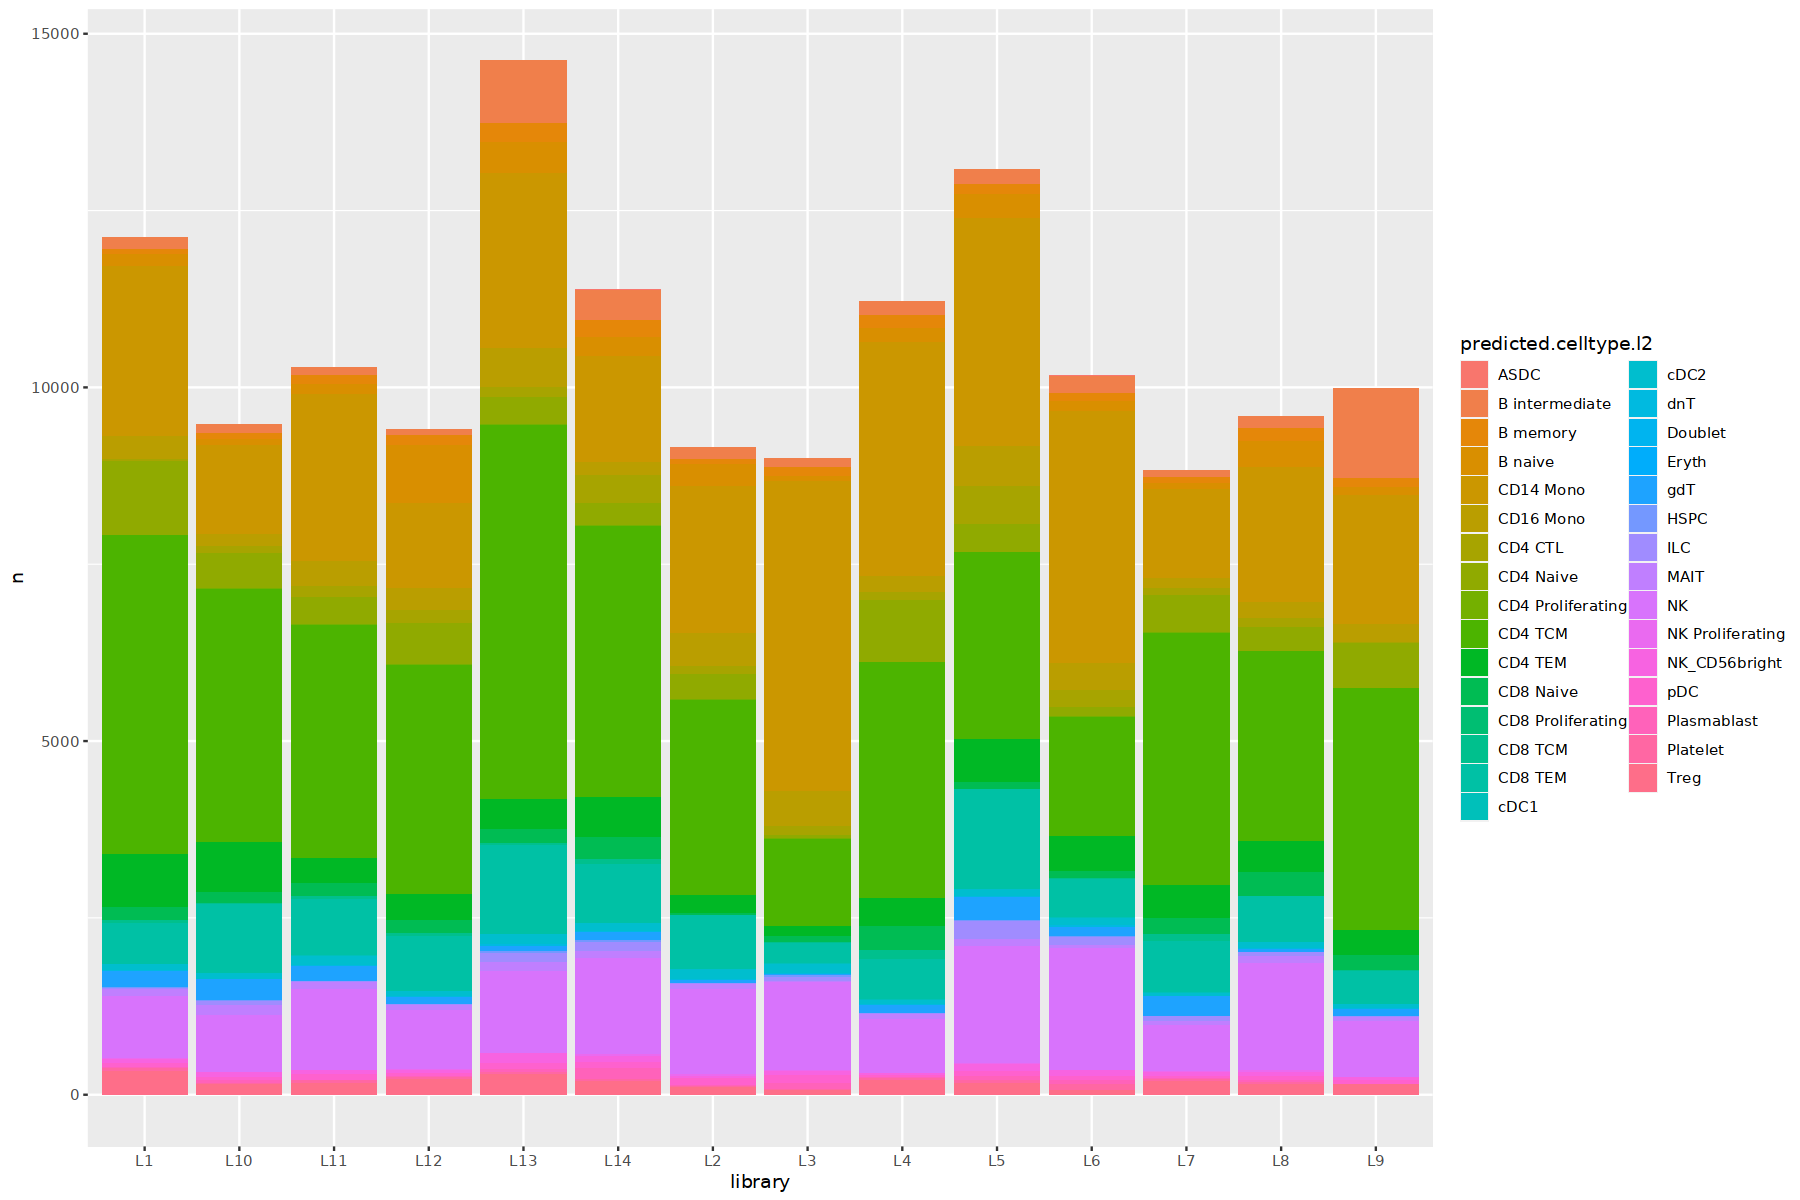

In [40]:
options(repr.plot.width=15, repr.plot.height=10)
ggplot(lib_distribution, aes(fill=predicted.celltype.l2, y=n, x=library)) + 
    geom_bar(position="stack", stat="identity")

# Combine different annotations for comparison

## Combine data

In [41]:
meta_data$cell_library = rownames(meta_data)

In [42]:
head(meta_data,2)

,nCount_HTO,B2_Scanorama_Singlet_cluster,B2_Scanorama_Singlet_rb_mt_cluster,cell_type_Scanorama,cluster_cell_type_Scanorama,classification_measurement,delta_ef_value_group_measurement,m_y,measurement_y,delta_ef_value_group,⋯,library,id,read,pattern,sequence,feature_type,in_sample,display_name,group_x,cell_library
,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,⋯,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<fct>,<fct>,<chr>
AAACCCACATACAGGG-1-L1,1574,8,8,B-cell,8_B-cell,acs_w_o_infection_TP1,x_greater_1_TP1,"M9 (14,3)",TP1,x_greater_1,⋯,L1,HTO_B0259,R2,5PNNNNNNNNNN(BC),CAGTAGTCACGGTCA,Antibody Capture,1,9.1,TP1,AAACCCACATACAGGG-1-L1
AAACCCACATGACTTG-1-L1,379,9,9,Monocytes - CD16_FCGR3A,9_Monocytes - CD16_FCGR3A,acs_w_o_infection_TP1,x_greater_1_TP1,"M9 (14,3)",TP1,x_greater_1,⋯,L1,HTO_B0259,R2,5PNNNNNNNNNN(BC),CAGTAGTCACGGTCA,Antibody Capture,1,9.1,TP1,AAACCCACATGACTTG-1-L1


In [43]:
## Merge original cluster-based and new azimuth (automated) annotation

In [44]:
combined = merge(meta_data, azimuth_annotation[,c('cell_library', 'predicted.celltype.l2.score', 'predicted.celltype.l2')], by = 'cell_library')

In [45]:
nrow(combined)

[1] 148275

In [47]:
### Calculate amount of cells per cell-type annotation

In [48]:
comparison = combined %>% group_by(cluster_cell_type_Scanorama, predicted.celltype.l2) %>% count()

In [49]:
### add total cell-amounts
total_scano = comparison %>% group_by(cluster_cell_type_Scanorama) %>% summarise(n=sum(n))
total_scano$predicted.celltype.l2 = 'X_Total'
total_azimuth = comparison %>% group_by(predicted.celltype.l2) %>% summarise(n=sum(n))
total_azimuth$cluster_cell_type_Scanorama = 'X_Total'

comparison = rbind(comparison, total_scano)
comparison = rbind(comparison, total_azimuth)

In [50]:
## generate filters (filter out cell-types with low amount of cells)
total_scano_filter = total_scano[total_scano$n > 1000,c('cluster_cell_type_Scanorama')]
total_scano_filter = rbind(total_scano_filter, data.frame(cluster_cell_type_Scanorama = 'X_Total'))
total_azimuth_filter = total_azimuth[total_azimuth$n > 1000,c('predicted.celltype.l2')]
total_azimuth_filter = rbind(total_azimuth_filter, data.frame(predicted.celltype.l2 = 'X_Total'))

comparison_filtered = merge(comparison, total_scano_filter)
comparison_filtered = merge(comparison_filtered, total_azimuth_filter)

In [51]:
#comparison_filtered = merge(comparison, total_scano_filter)

In [52]:
head(comparison_filtered)

,predicted.celltype.l2,cluster_cell_type_Scanorama,n
,<chr>,<chr>,<int>
1,B intermediate,X_Total,4261
2,B intermediate,14_Other,5
3,B intermediate,13_Dendritic,2
4,B intermediate,8_B-cell,3270
5,B intermediate,10_B-cell,889
6,B intermediate,4_Monocytes - CD14,64


## Visualize comparison

In [53]:
### Absolute Values

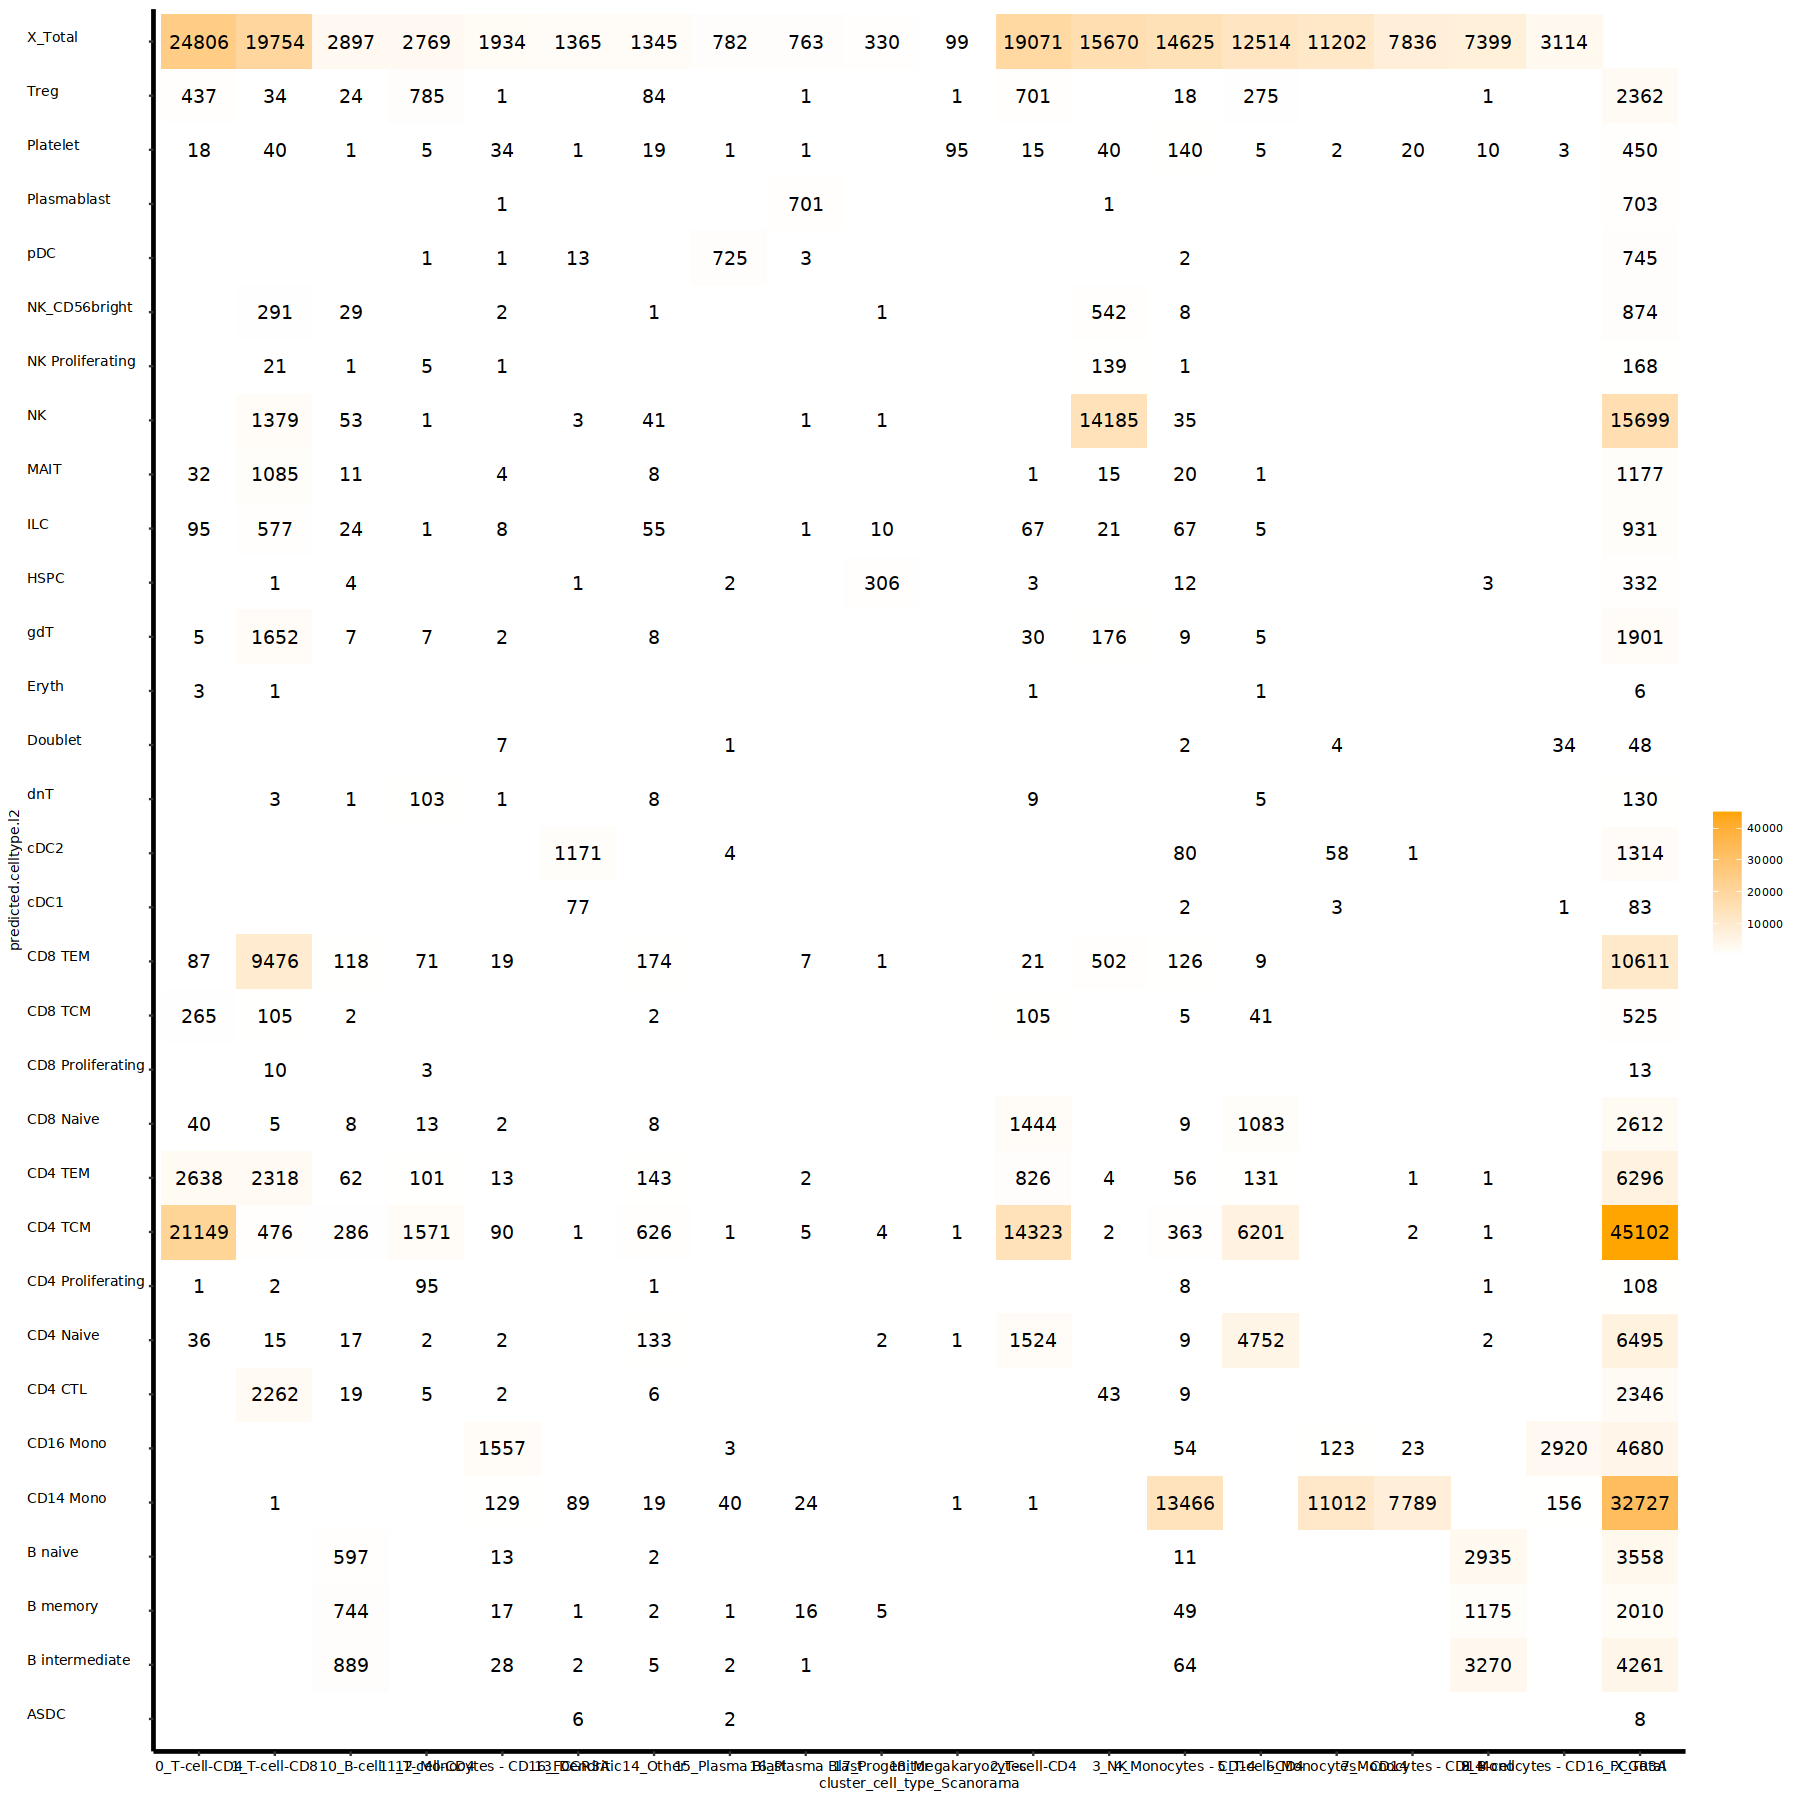

In [54]:
options(repr.plot.width=15, repr.plot.height=15)
ggplot(comparison, aes(cluster_cell_type_Scanorama,predicted.celltype.l2 , fill= n)) + 
  geom_tile() +  geom_text(aes(label = n)) + theme(axis.text.x = element_text(angle = 90)) + plot_config +

  scale_fill_gradient2(low="white", high="orange", guide="colorbar")

In [55]:
## Absolute Values filtered only on most important cell-types
options(repr.plot.width=15, repr.plot.height=15)
pdf(paste0('figures/Final_Figures/SUPP8_Comparison_Azimuth_Cluster_Annotations', '.pdf'),     width =7, height = 7)
ggplot(comparison_filtered, aes(cluster_cell_type_Scanorama,predicted.celltype.l2 , fill= n)) + 
  geom_tile() +  plot_config + geom_text(aes(label = n), size = 2.5) + theme(axis.text.x = element_text(angle = 90)) +
  scale_fill_gradient2(low="white", high="orange", guide="colorbar")
dev.off()

png 
  2

In [57]:
## Relative Values (taking cluster-based annotation as base)

In [58]:
total_azimuth$amount_cells_azimuth = total_azimuth$n
total_azimuth$n = NULL
total_azimuth$cluster_cell_type_Scanorama = NULL

total_scano$amount_cells_scano = total_scano$n
total_scano$n = NULL
total_scano$predicted.celltype.l2 = NULL

In [59]:
#amount_cells_azimuth_mapping = comparison %>% group_by(predicted.celltype.l2) %>% summarise(amount_cells_azimuth = sum(n))

In [60]:
head(total_azimuth,2)

predicted.celltype.l2,amount_cells_azimuth
<chr>,<int>
ASDC,8
B intermediate,4261


In [61]:
unique(total_azimuth$predicted.celltype.l2)

[1] "ASDC"              "B intermediate"    "B memory"         
 [4] "B naive"           "CD14 Mono"         "CD16 Mono"        
 [7] "CD4 CTL"           "CD4 Naive"         "CD4 Proliferating"
[10] "CD4 TCM"           "CD4 TEM"           "CD8 Naive"        
[13] "CD8 Proliferating" "CD8 TCM"           "CD8 TEM"          
[16] "Doublet"           "Eryth"             "HSPC"             
[19] "ILC"               "MAIT"              "NK"               
[22] "NK Proliferating"  "NK_CD56bright"     "Plasmablast"      
[25] "Platelet"          "Treg"              "cDC1"             
[28] "cDC2"              "dnT"               "gdT"              
[31] "pDC"

In [62]:
head(comparison)

cluster_cell_type_Scanorama,predicted.celltype.l2,n
<chr>,<chr>,<int>
0_T-cell-CD4,CD4 Naive,36
0_T-cell-CD4,CD4 Proliferating,1
0_T-cell-CD4,CD4 TCM,21149
0_T-cell-CD4,CD4 TEM,2638
0_T-cell-CD4,CD8 Naive,40
0_T-cell-CD4,CD8 TCM,265


In [63]:
comparison = merge(comparison, total_scano)
comparison = merge(comparison, total_azimuth )

In [64]:
comparison$percentage_scano = round((comparison$n/comparison$amount_cells_scano) * 100,2)
comparison$percentage_azimuth = round((comparison$n/comparison$amount_cells_azimuth) * 100,2)

In [65]:
head(comparison,2)

,predicted.celltype.l2,cluster_cell_type_Scanorama,n,amount_cells_scano,amount_cells_azimuth,percentage_scano,percentage_azimuth
,<chr>,<chr>,<int>,<int>,<int>,<dbl>,<dbl>
1,ASDC,15_Plasma Blast,2,782,8,0.26,25
2,ASDC,13_Dendritic,6,1365,8,0.44,75


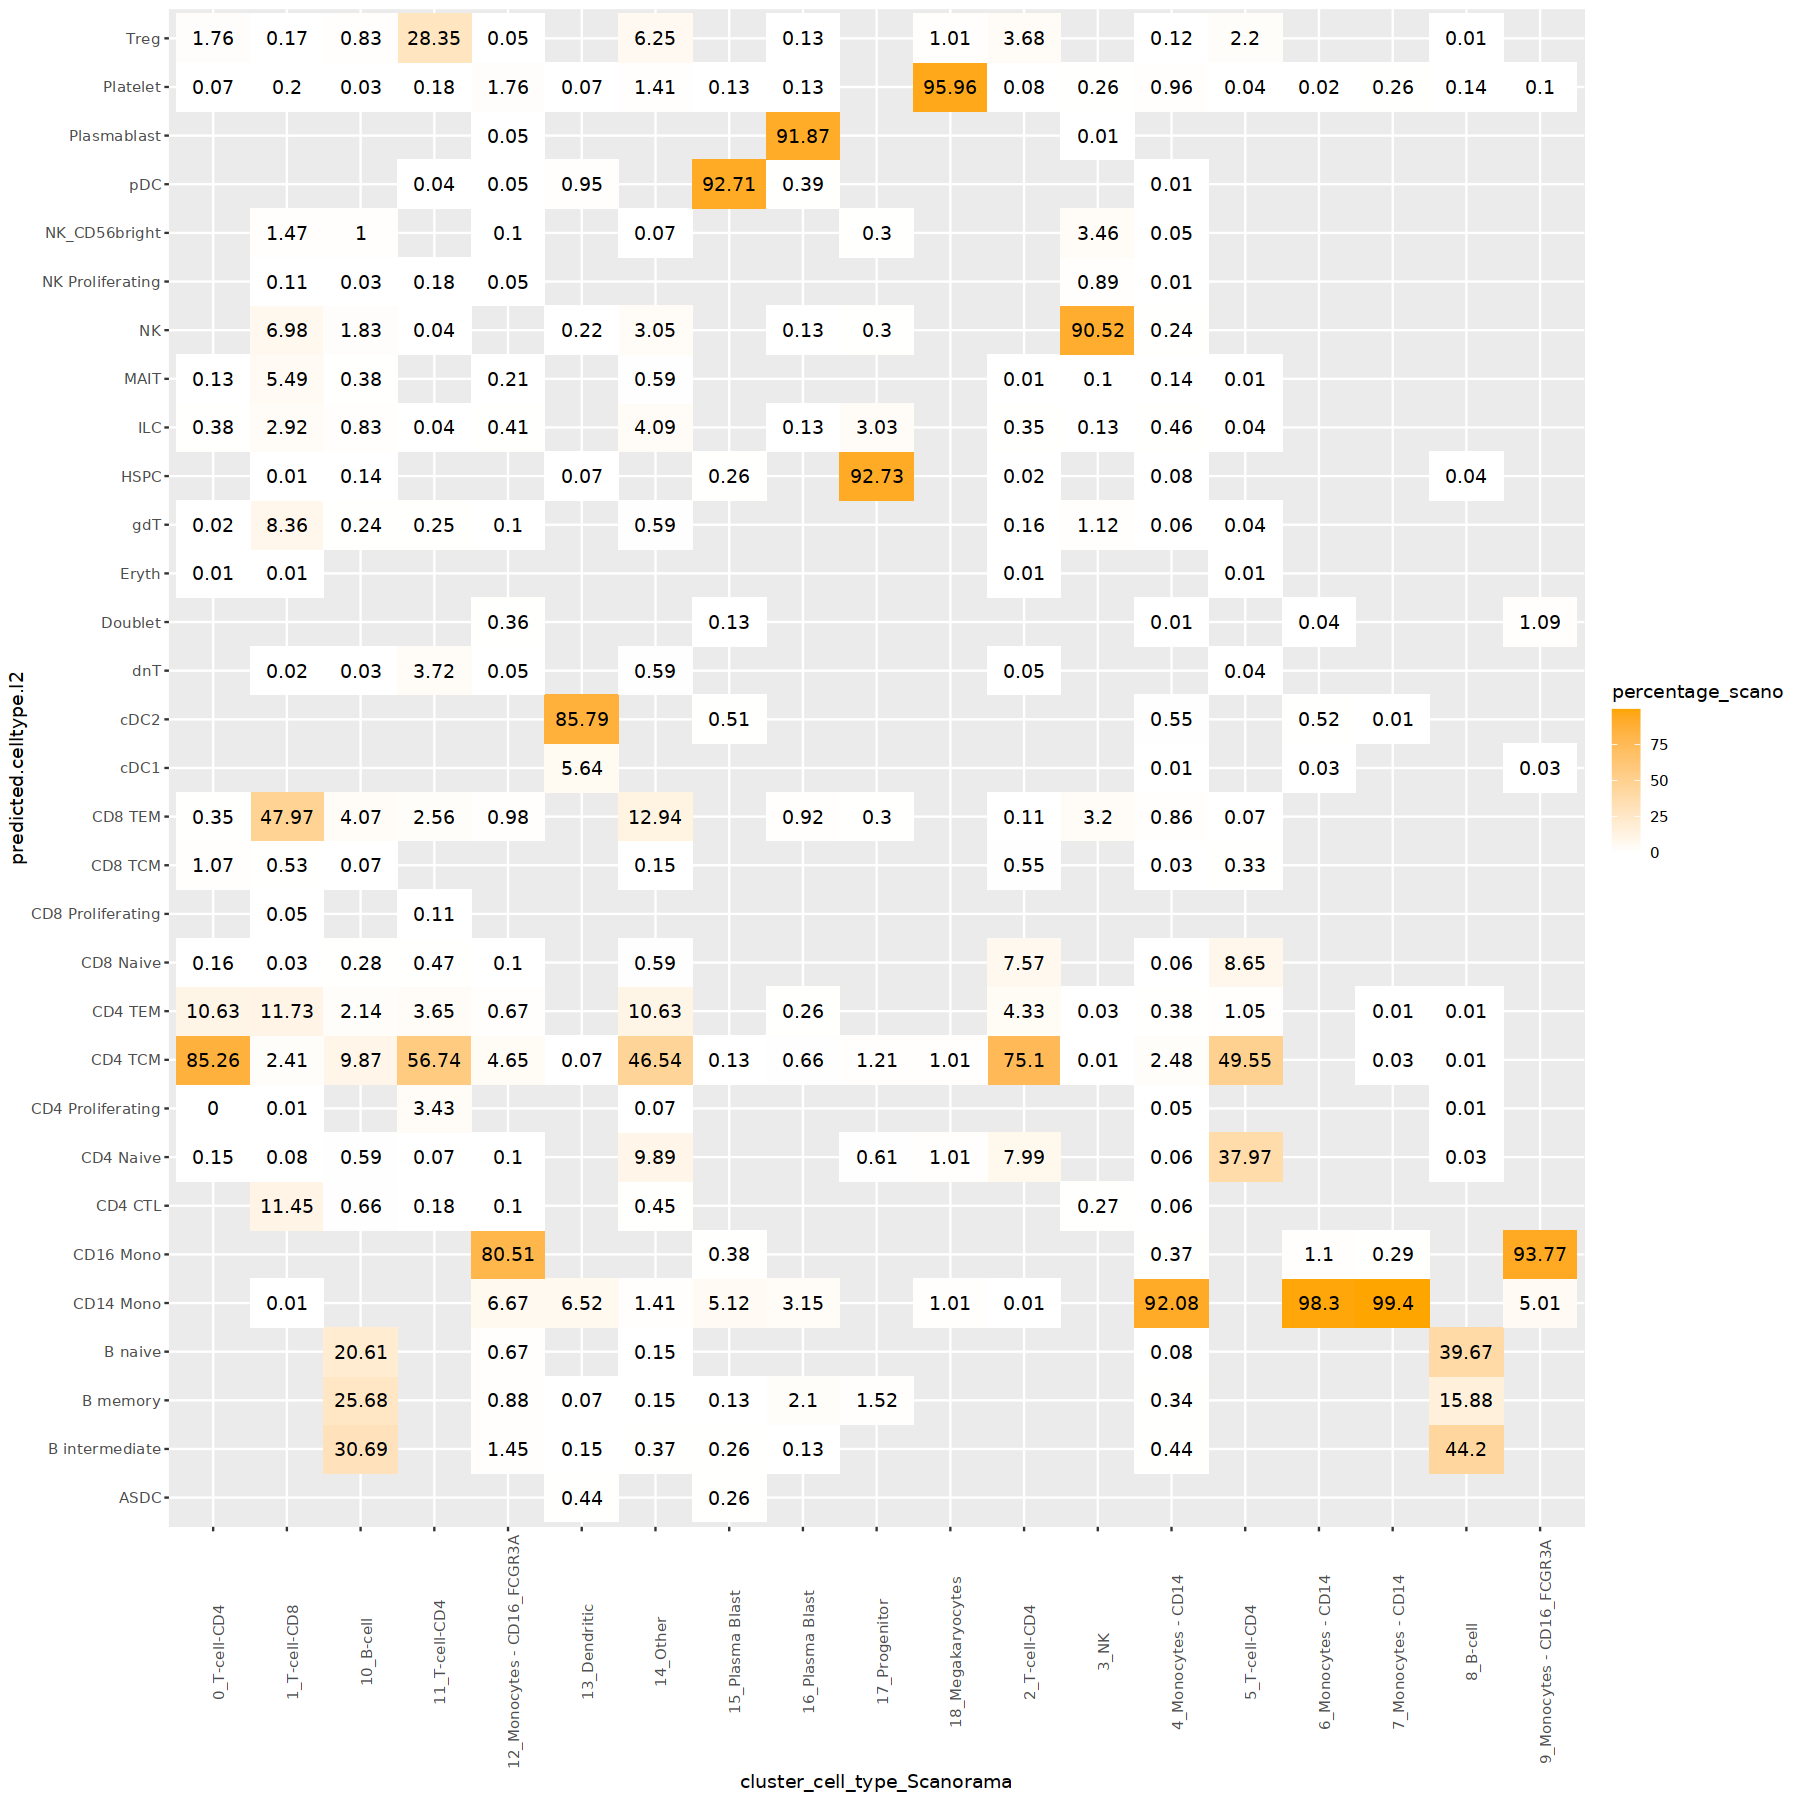

In [66]:
options(repr.plot.width=15, repr.plot.height=15)
ggplot(comparison, aes(cluster_cell_type_Scanorama,predicted.celltype.l2 , fill= percentage_scano)) + 
  geom_tile() +  geom_text(aes(label = percentage_scano)) + theme(axis.text.x = element_text(angle = 90)) +
  scale_fill_gradient2(low="white", high="orange", guide="colorbar")

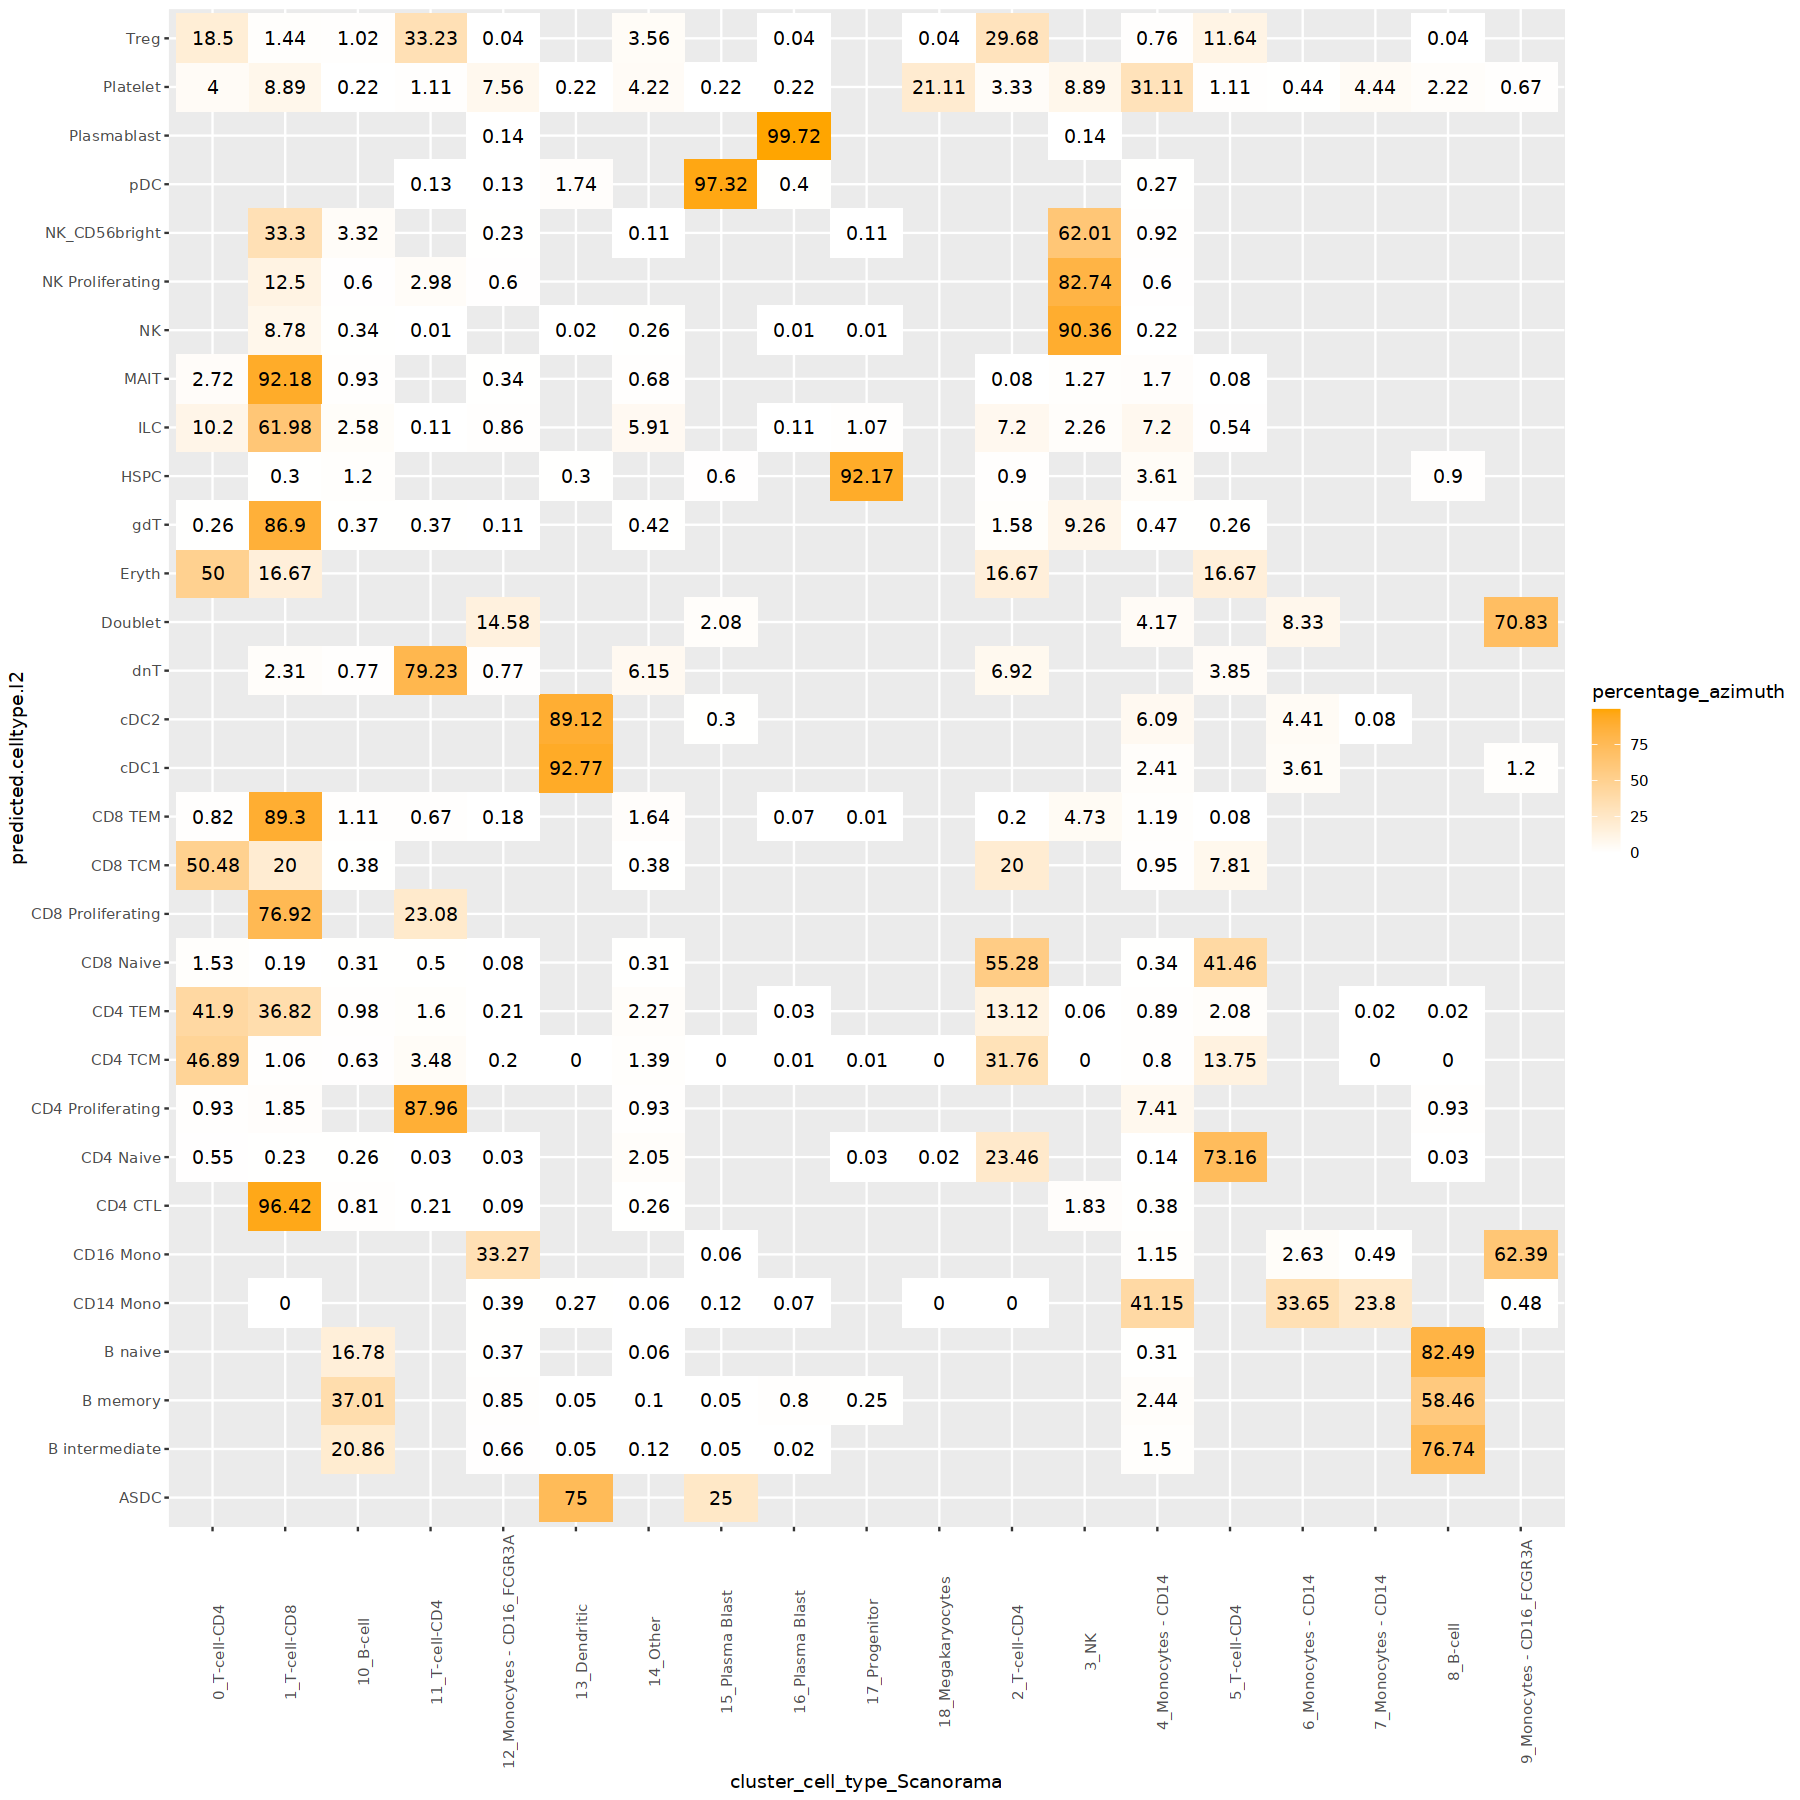

In [67]:
options(repr.plot.width=15, repr.plot.height=15)
ggplot(comparison, aes(cluster_cell_type_Scanorama,predicted.celltype.l2 , fill= percentage_azimuth)) + 
  geom_tile() +  geom_text(aes(label = percentage_azimuth)) + theme(axis.text.x = element_text(angle = 90)) +
  scale_fill_gradient2(low="white", high="orange", guide="colorbar")